<a href="https://colab.research.google.com/github/djasantos/PhD/blob/master/Source_Apportionment_of_Black_Carbon_WoodBurning_and_FossilFuel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference Paper: [Using Aerosol Light Absorption
Measurements for the Quantitative
Determination of Wood Burning and
Traffic Emission Contributions to
Particulate Matter](https://https://pubs.acs.org/doi/10.1021/es702253m)

In [118]:
# Import libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
# Read Data from csv  
campinasDF = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Doutorado/Database/Camp2py.csv')
campinasDF.head()

def apportBC(UV = 470, abs_UV = campinasDF['abs_470'],
             IR = 950, abs_IR = campinasDF['abs_950'],
             alphaFF = 0.9, alphaWB = 2.5):
    
  k1 = (UV/IR)**(-alphaFF)
  k2 = (UV/IR)**(alphaWB)
  
  absWB_UV = (1 / (1 - k1*k2)) * (abs_UV - k1*abs_IR)
  absWB_IR = k2*absWB_UV  
  absFF_UV = abs_UV - absWB_UV
  absFF_IR = abs_IR - absWB_IR
  BCff = (absFF_IR/abs_IR)*campinasDF['blackcarbon']
  BCwb = campinasDF['blackcarbon'] - BCff
  
  labels = 'BC ff', 'BC wb'
  sizes = [BCff.mean(),BCwb.mean()]
  
  fig1, ax1 = plt.subplots()
  ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
          shadow=True, startangle=90, colors = ['gray','brown'])
  ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
  plt.title("\u03B1FF = " + str(alphaFF) + " | \u03B1WB = " + str(alphaWB))
  plt.show()

  return BCff, BCwb

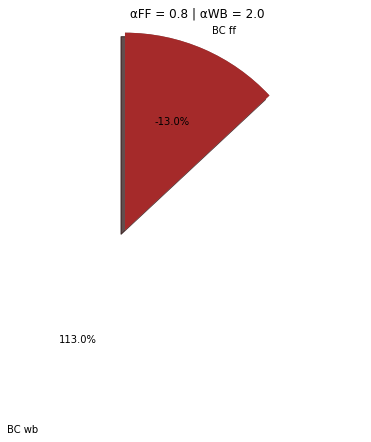

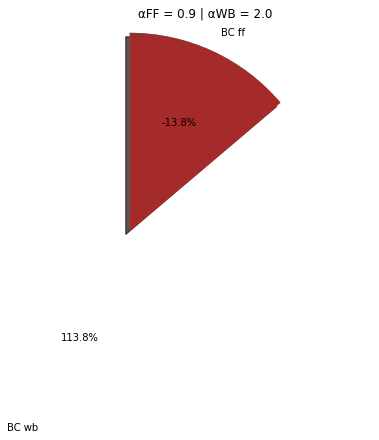

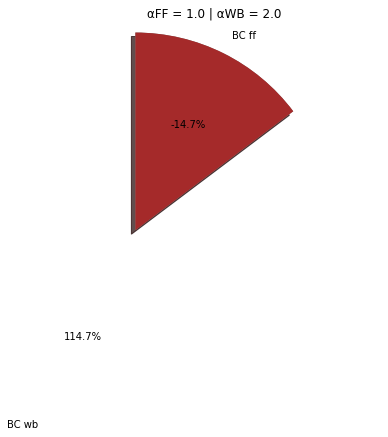

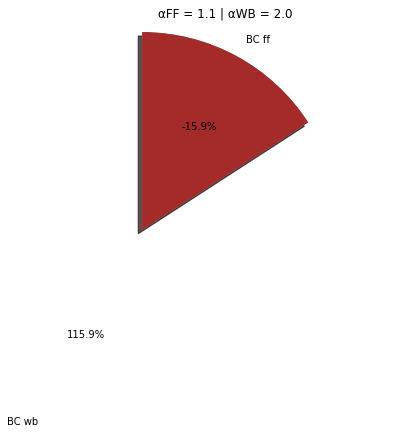

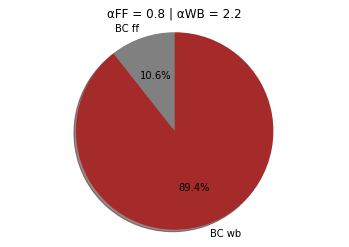

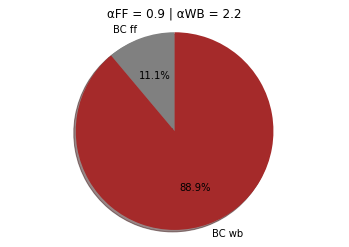

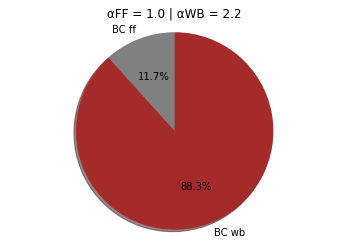

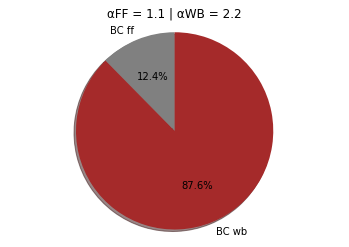

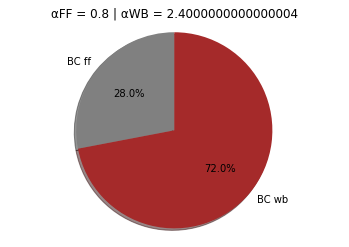

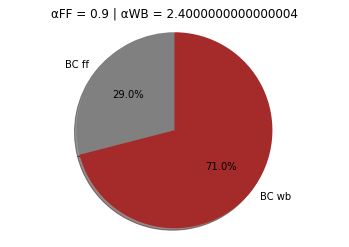

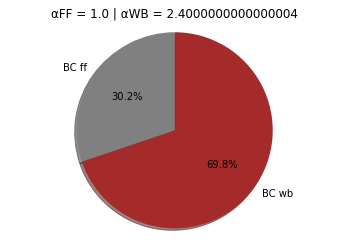

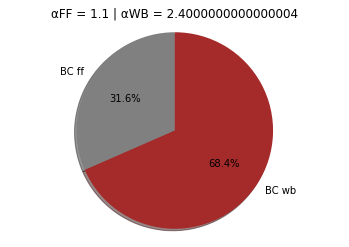

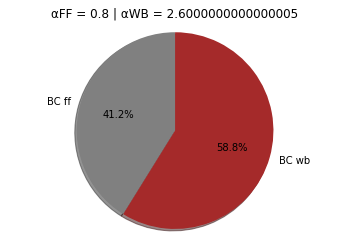

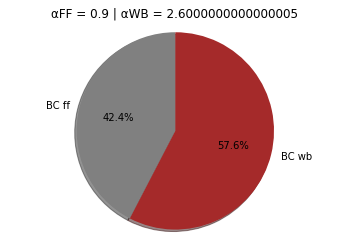

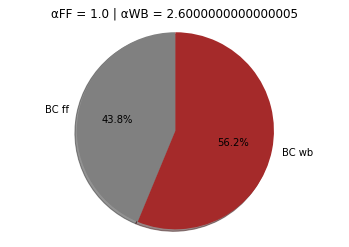

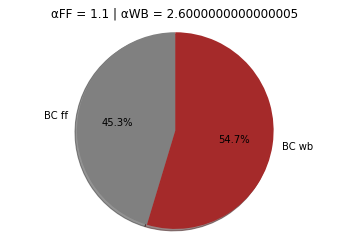

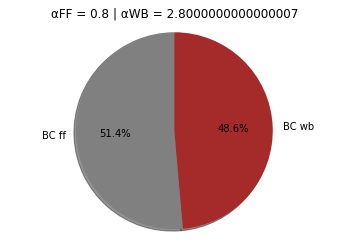

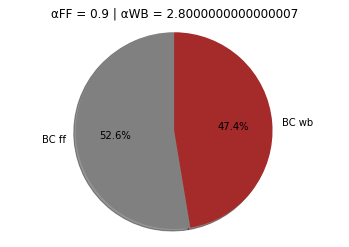

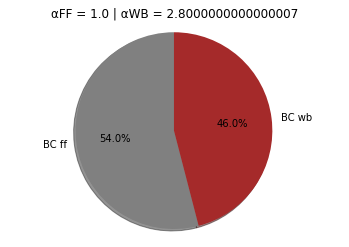

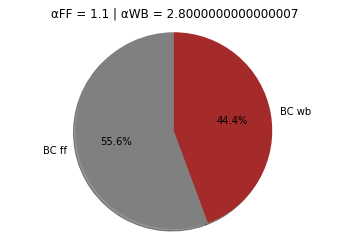

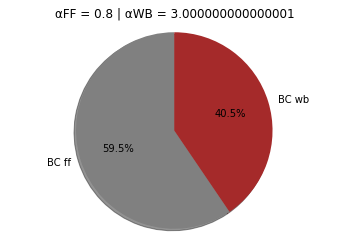

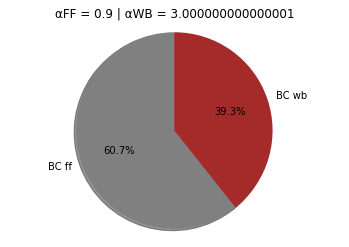

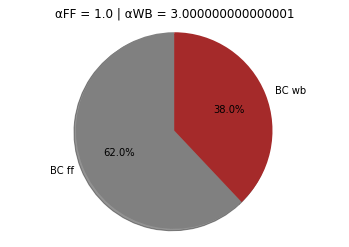

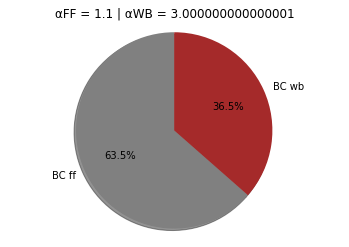

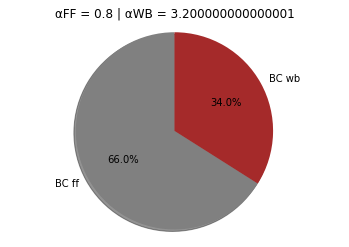

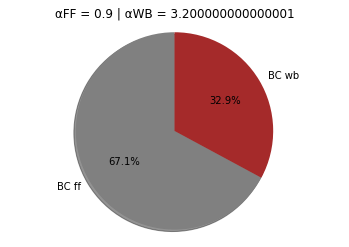

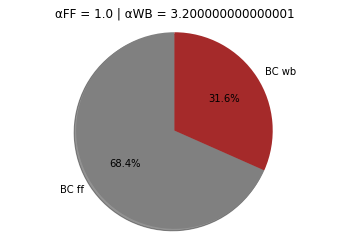

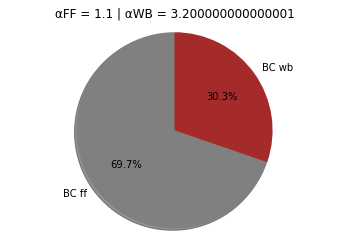

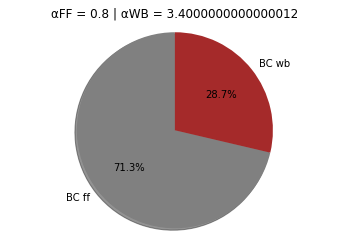

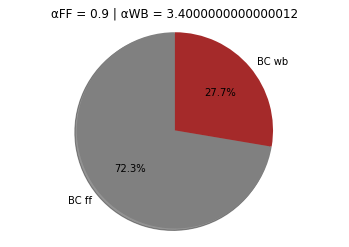

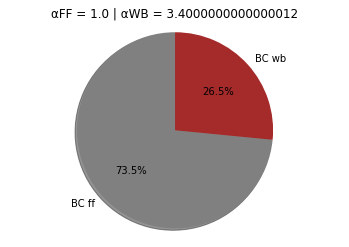

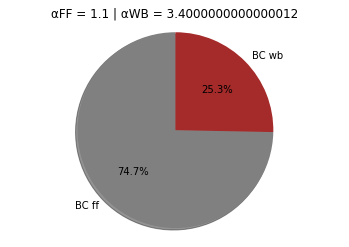

In [124]:
for alphaWB in np.arange(2, 3.5, 0.2):
  for alphaFF in np.arange(0.8, 1.1, 0.1):
    apportBC(alphaWB = alphaWB, alphaFF = alphaFF, 
             IR = 950, abs_IR = campinasDF['abs_950'],
             UV = 470, abs_UV = campinasDF['abs_470'])

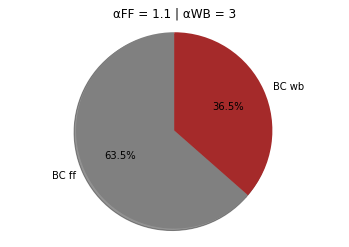

In [122]:
campinasDF['BCff'],campinasDF['BCwb'] = apportBC(alphaWB = 3, alphaFF = 1.1)
BCapport = campinasDF[['utctime','localtime','BCff','BCwb']]
BCapport.to_csv('BCapport.csv')
!cp BCapport.csv "/content/drive/My Drive/Colab Notebooks/Doutorado/ExportedData/"

In [ ]:
campinasDF.corr()